# Criação de Dados para teste

Dados de treino

<Axes: xlabel='x', ylabel='y'>

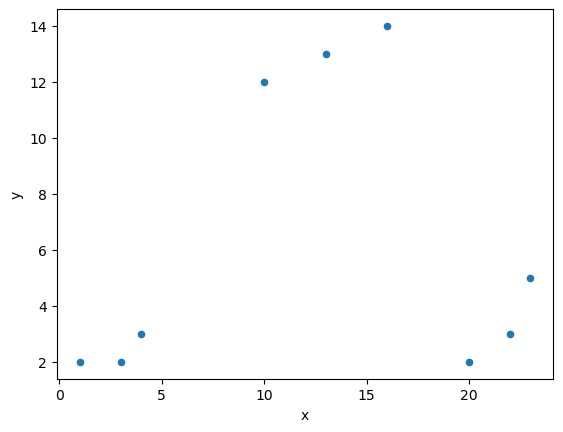

In [1]:
import pandas as pd

dados = [[1,2],
        [3,2],
        [4,3],
        [10,12],
        [13,13],
        [16,14],
        [20,2],
        [22,3],
        [23,5]]
dados
df = pd.DataFrame(dados, columns=['x','y'])
df.plot(x='x', y='y', kind='scatter')

Dados de teste

<Axes: xlabel='x', ylabel='y'>

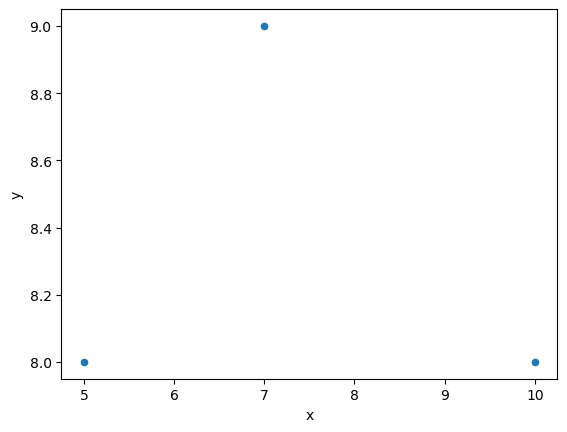

In [2]:
dados_teste = [[5,8],
              [7,9],
              [10,8]]
df_teste = pd.DataFrame(dados_teste, columns=['x','y']) 
df_teste.plot(x='x', y='y', kind='scatter')

Vendo dados juntos

<Axes: xlabel='x', ylabel='y'>

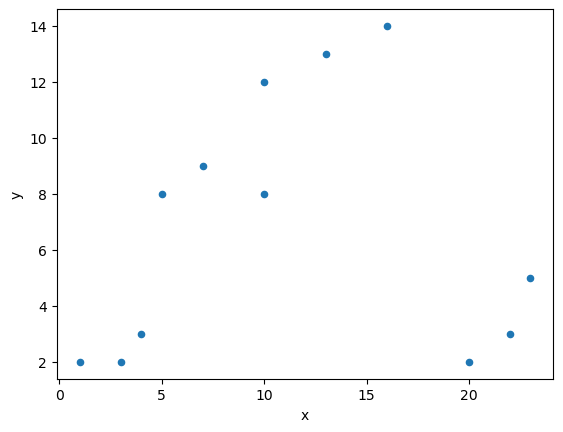

In [3]:
df_juntos = pd.merge(df, df_teste, how = 'outer')
df_juntos.plot(x='x', y='y', kind='scatter')   

Aplicar algoritmos de agrupamento de dados

K-means

In [6]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)
rotulos_k_means = kmeans.labels_
rotulos_k_means

c:\Users\migue\miniconda3\envs\spyder-env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 2, 2])

Predict do K-means